# Data Exploration
In this notebook we understand how the data is organized and explore basic features of the data.

In [3]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
from datetime import datetime
from nltk.stem.snowball import EnglishStemmer


sns.set_theme(style="darkgrid")



In [4]:
#import data
df_tw  = pd.read_csv("Data/auspol2019.csv")
df_geo = pd.read_csv("Data/location_geocode.csv")

In [5]:
df_tw.sample(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
164420,2019-05-18 09:02:31,1129673608299548673,It's early but....#ausvotes https://t.co/z86xI...,23.0,165.0,1.300693e+07,Josh Taylor,joshgnosis,Front Page Editor for https://t.co/dVPe2p6YCl....,"Sydney, New South Wales",2008-02-03 11:03:53
23179,2019-05-16 02:12:23,1128845619102068736,So much for the lnp-ipa regime 'protecting' Au...,0.0,1.0,3.098362e+09,Richard Forrester,RichForrest2,Commenting & working towards social justice & ...,"Mornington Peninsula, Melbourn",2015-03-19 19:29:57
40031,2019-05-19 09:50:19,1130048027178127360,Of course; but perhaps an electoral system div...,1.0,0.0,1.153774e+08,Nick Byrne,ByrneNick,@type_human - #PublicInterestTech - Occasi...,"Mostly Melbourne, Australia",2010-02-18 13:23:23
158872,2019-05-18 11:11:30,1129706067506556928,So Bill Shorten Hillary’d his Bradbury then #a...,1.0,3.0,5.068061e+08,Nikola Casule,NikolaCasule,Head of Research and Investigations at @greenp...,"Sydney, Australia",2012-02-28 03:29:17
126331,2019-05-13 07:30:58,1127838630561497088,#auspol #LNPfail https://t.co/jnPJGLSZm9,0.0,0.0,5.171303e+07,💧Colin Trainor,DrColinTrainor,Conservation biologist - biogeographer; resear...,"Ballarat, Victoria, Australia",2009-06-28 11:57:17
139631,2019-05-11 18:13:35,1127275575029010432,What a scary thought 🤦‍♂️#ausvotes #auspol htt...,0.0,1.0,2.895186e+09,Stephen Battaglene,SBattaglene,Sports lover especially the mighty Pies and a ...,NaN,2014-11-10 02:38:58
15691,2019-05-18 07:31:39,1129650741084246018,"Election 2019 LIVE: Bill Shorten, Labor to win...",0.0,1.0,4.364680e+09,Helen L'Orange,HelenLOrange2,NaN,NaN,2015-11-26 08:16:50
175293,2019-05-15 17:54:13,1128720253289095169,@qwertyLGBT @vanOnselenP @australian @ScottMor...,0.0,0.0,1.356898e+09,Kirsti Miller🇦🇺,KirstiMiller30,World Aquathon Champion- Aussie-Sports-Trailbl...,BROKEN Hill,2013-04-16 13:31:21
52855,2019-05-18 14:09:36,1129750891521814528,A great big thanks to goes out to Queensland.\...,0.0,0.0,1.641708e+07,❌Got any evidence?❌,gotanyevidence,"White identifying non white. Allergic to kids,...","Melbourne, Australia",2008-09-23 09:05:31
149644,2019-05-19 07:46:49,1130016946546544641,It would appear a One Nation billboard vehicle...,141.0,476.0,1.854187e+08,Alex Johnston,swegen31,"News director @WINNews_Tas, maturing golfer, d...",Hobart,2010-08-31 23:15:12


In [6]:
df_geo.sample(10)

,name,lat,long
2760,"Flensburg, Germany",54.793743,9.446996
1552,"Dublin, Ireland 🇮🇪",53.349805,-6.260310
6679,South-East Melbourne,-37.813628,144.963058
6370,"Sth Hemi on a rock, area 51",37.237162,-115.801843
2136,2137.0,NaN,NaN
3912,3913.0,NaN,NaN
9798,Melbourne/London/Amsterdam/NYC,-37.813628,144.963058
2106,"Lower Blue Mountains, NSW",-33.409983,150.303732
2042,2043.0,NaN,NaN
4639,Southern Ontario,43.642329,-79.374274


Let's understand a few basic properties of the data. On thing that was observed is that there are potential entries that are entered incorrectly. We will find these entries!

In [7]:
#Finding indices of Data that is incorrect/incomplete

potential_bad_indices = []
for index in df_tw.index:
    for col in list(df_tw.columns):
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            potential_bad_indices = potential_bad_indices + [index]
    
    


In [8]:
df_tw.loc[potential_bad_indices].sample(10)
#list(df_tw.columns)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
1702,2019-05-20 00:25:21,1130268235884969984,@abcnews @AntonyGreenABC @ScottMorrisonMP How ...,1.0,3.0,1.033169e+18,Old cowboy 1,Oldcowboy14,NaN,NaN,2018-08-25 01:46:36
117559,2019-05-14 06:04:22,1128179226362896384,"If you have voted early in the election, is it...",0.0,0.0,1.927235e+07,GeorgieM,lettermouth,NaN,Melbourne Australia,2009-01-21 02:44:48
95972,2019-05-16 08:53:28,1128946558018318336,Ruddock on #TheDrum. What a vile individual. H...,10.0,30.0,1.012280e+18,jayjo,jayjo78272487,NaN,NaN,2018-06-28 10:23:05
136428,2019-05-12 02:14:34,1127396617802223621,@SkyNewsAust @SHendersonMP @ScottMorrisonMP Is...,21.0,66.0,6.318509e+08,💧Angry Granny,AngryGranny1,The Promise of Twitter,NaN,2012-07-10 09:47:19
112405,2019-05-14 22:59:16,1128434633513656321,Greens signs are being removed from rental pro...,2.0,2.0,4.737143e+08,T,twbtwb,NaN,"Meanjin (Brisbane), Australia",2012-01-25 08:02:26
179792,2019-05-12 07:19:51,1127473447045611520,I thought those percentages were the Parrot’s ...,0.0,0.0,2.208932e+07,Steve Williams,swillmedia,Writer. Cat servant.,NaN,2009-02-27 01:07:11
150477,2019-05-19 01:14:02,1129918098813796352,So disappointed in Australia right now 🤦‍♀️ I’...,0.0,1.0,8.776309e+17,Vanessa (Nessy),NessyRosy90,NaN,Australia,2017-06-21 20:54:39
174817,2019-05-16 01:21:47,1128832888412049409,Clive Palmer is going to win this election for...,0.0,0.0,1.489730e+07,💧Kara,KaraLambo,"Mad MFC supporter, and just thinks people shou...",NaN,2008-05-25 08:07:04
114444,2019-05-14 12:12:41,1128271914600820736,@TurnbullMalcolm @LowyInstitute Did you put $1...,0.0,2.0,9.241135e+17,Robert Wolli,WolliRobert,NaN,NaN,2017-10-28 03:20:10
541,2019-05-20 06:48:20,1130364616628826112,@thomasvarcoel @SenatorDoug 🤣🤣 omg! Seriously ...,0.0,1.0,8.465737e+17,cleopatramarc,cleopatramarc98,NaN,NaN,2017-03-28 04:04:34


We see that a lot of these'NotANumber' entries are in user_location, user_description, which is not a problem. However, there are other entries that are incomplete! We will find this entries next.

In [9]:
bad_indices= []
for index in df_tw.loc[potential_bad_indices].index:
    for col in ['created_at', 'full_text', 'id', 'favorite_count', 'retweet_count','user_created_at']:
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            bad_indices = bad_indices + [index]

In [10]:
df_tw.loc[bad_indices]

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
63778,2019-05-18 10:45:32,1129699533758259201,I see brain dead people #auspol,1.0,1.0,19761704.0,💧Cathleen McVey Eades,cathleen5,Writer/Producer/Director/ Digital editor semi-...,NaN,NaN
63778,2019-05-18 10:45:32,1129699533758259201,I see brain dead people #auspol,1.0,1.0,19761704.0,💧Cathleen McVey Eades,cathleen5,Writer/Producer/Director/ Digital editor semi-...,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63779,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178211,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clearly see the issues! There is one entry that appears several times, and it is clearly entered incorrectly. We will delete all these entries. We can also see that some these 234 possible incorrect data are because there is no information of the date when the user was created - we can ignore this as it doesn't seem a big problem.

In [11]:
indices_repeated_entry= []
for index in df_tw.loc[bad_indices].index:
    for col in ['created_at', 'full_text', 'id', 'favorite_count', 'retweet_count']:
        if type(df_tw.loc[[index]][col].iloc[0]) == str:
            continue
        if math.isnan(df_tw.loc[[index]][col].iloc[0]):
            indices_repeated_entry = indices_repeated_entry + [index]

In [12]:
df_tw.loc[indices_repeated_entry].sample(10)

,created_at,id,full_text,retweet_count,favorite_count,user_id,user_name,user_screen_name,user_description,user_location,user_created_at
120508,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132389,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120508,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132389,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120508,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125104,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71541,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84716,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132389,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120508,Born Glasgow Scotland raised in Aus. A lefty b...,"perth, wa",2009-01-30 10:16:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks that we found the bad indices! Let's double check!

In [13]:
set(df_tw.loc[indices_repeated_entry]['created_at'])

{'Born Glasgow Scotland raised in Aus. A lefty by birthright. RT usually reflects my opinion'}

Looks right! Let's delete these entries!

In [14]:
df_tw = df_tw.drop(indices_repeated_entry)

In [15]:
print("We deleted " + str(len(indices_repeated_entry)) + " entries")

We deleted 432 entries


In [16]:
#init = where we start spliggin , list_up = upperbounds
#This is just a helper to make a plot later
def barplot_prep(dic_dist,init,list_up):
    temp_dic = dic_dist
    number_a = list(temp_dic.values()) #users
    number_b = list(temp_dic.keys()) #likes
    
    ran = [ 0 for i in range(len(list_up) - 1) ]
    ran[0] = [init, list_up[0]+1]
    for j in range(1,len(list_up)-1):
        ran[j] = [list_up[j-1]+1,list_up[j]+1]
    values = [0 for i in range(len(ran) + 1) ]
    labels = [str(r[0]) + '-' + str(r[1]-1) for r in ran] + [">" + str(ran[-1][1]-1)]
    for i in range(len(ran)):
        values[i] = sum( number_a[j] for j in range(len(number_a)) if number_b[j] in range(ran[i][0],ran[i][1]))
    values[-1] = sum([number_a[j] for j in range(len(number_a)) if number_b[j] > ran[-1][1] + 1])
    return labels,values

In [17]:
tweets_by_user = {}
likes_by_user = {}
retweets_by_user = {}
#This should be written better!
for index in df_tw.index:
     likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0
     tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0
     retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = 0

for index in df_tw.index:
    if (not math.isnan(df_tw.loc[[index]]['user_id'].iloc[0])):
      tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = tweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]]+1

      if (not math.isnan(df_tw.loc[[index]]['favorite_count'].iloc[0])):
            likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = likes_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] + df_tw.loc[[index]]['favorite_count'].iloc[0]

      if (not math.isnan(retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]])):
            retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] = retweets_by_user[df_tw.loc[[index]]['user_id'].iloc[0]] + df_tw.loc[[index]]['retweet_count'].iloc[0]




In [18]:
#This can likely be written cleaner! 

basic_info = {  "Number of tweets": len(set(df_tw['id'])), #check no repeated, 

                "Distinct users" : len(set(df_tw['user_id'])),

                "User(s) with most tweets": list(set(df_tw.loc[df_tw['user_id'] == max(tweets_by_user, key = tweets_by_user.get)]['user_name'])) + [tweets_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(tweets_by_user, key = tweets_by_user.get)]['user_id']))[0]]],

                "User(s) with most (total) likes": list(set(df_tw.loc[df_tw['user_id'] == max(likes_by_user, key = likes_by_user.get)]['user_name'])) + [likes_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(likes_by_user, key = likes_by_user.get)]['user_id']))[0]]], 

                "User with most (total) retweets ": list(set(df_tw.loc[df_tw['user_id'] == max(retweets_by_user, key = retweets_by_user.get)]['user_name'])) + [retweets_by_user[list(set(df_tw.loc[df_tw['user_id'] == max(retweets_by_user, key = retweets_by_user.get)]['user_id']))[0]]],

                "Tweet with most retweets": df_tw.loc[ df_tw['retweet_count'] == max(list(df_tw['retweet_count']))]['full_text'].iloc[0] ,

                "Tweet with most likes": df_tw.loc[ df_tw['favorite_count'] == max(list(df_tw['favorite_count']))]['full_text'].iloc[0] ,
                
                "Total Number of Retweets": sum([x for x in list(df_tw['retweet_count']) if not math.isnan(x)]),

                "Total Number of Likes": sum([x for x in list(df_tw['favorite_count']) if not math.isnan(x)]),

                "Average Number of Likes per Tweet": np.mean([x for x in list(df_tw['favorite_count']) if not math.isnan(x)]),

                "Average Number of Retweets per Tweet": np.mean([x for x in list(df_tw['retweet_count']) if not math.isnan(x)]),

                "Average Number of Tweets per User": np.mean(list(tweets_by_user.values())),

                "Average Number of Retweets per User": np.mean(list(retweets_by_user.values())) ,

                "Average Number of Likes per User": np.mean(list(likes_by_user.values())) ,
                
                "Date First Tweet": min([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['created_at'])]), 

                "Date Last Tweet": max([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['created_at'])]),
                
                "Date Oldest User": min([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['user_created_at']) if  type(x) == str]),

                "Date Newest User": max([datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in list(df_tw['user_created_at']) if  type(x) == str])
                }

In [19]:
distribution_retweet =  dict(collections.Counter(list(df_tw['retweet_count'])))
distribution_likes = dict(collections.Counter(list(df_tw['favorite_count'])) )
distribution_tweets_user = dict(collections.Counter(list(tweets_by_user.values()))) 
distribution_retweets_user = dict(collections.Counter(list(retweets_by_user.values())))
distribution_likes_user  = dict(collections.Counter(list(likes_by_user.values())))

In [20]:
print(pd.Series(basic_info))

Number of tweets                                                                   183370
Distinct users                                                                      45862
User(s) with most tweets                                                [💧 Sur Plus, 937]
User(s) with most (total) likes                                     [Van Badham, 49066.0]
User with most (total) retweets                                     [Van Badham, 14160.0]
Tweet with most retweets                Shocking defeat for Left in Australia, stunned...
Tweet with most likes                   Shocking defeat for Left in Australia, stunned...
Total Number of Retweets                                                         699430.0
Total Number of Likes                                                           2046227.0
Average Number of Likes per Tweet                                               11.159006
Average Number of Retweets per Tweet                                              3.81431
Average Nu

Text(0.5, 1.0, 'Here Goes a Title')

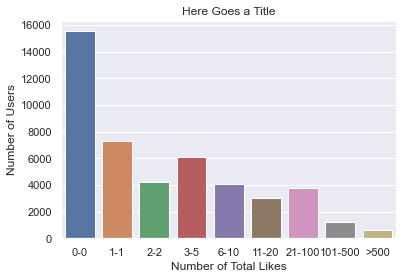

In [21]:
labels, values = barplot_prep(distribution_likes_user, 0,[0,1,2,5,10,20,100,500,1000])
p1 = sns.barplot(x = labels, y = values)
p1.set_xlabel("Number of Total Likes");
p1.set_ylabel("Number of Users");
p1.set_title("Here Goes a Title")


In [22]:
df_tw.columns

Index(['created_at', 'id', 'full_text', 'retweet_count', 'favorite_count',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_location', 'user_created_at'],
      dtype='object')

Text(0.5, 1.0, 'Here Goes a Title')

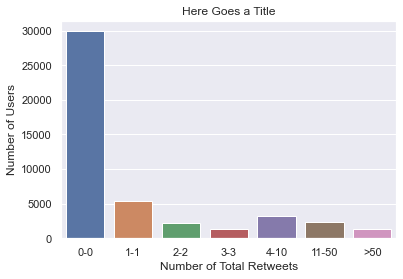

In [23]:

labels, values = barplot_prep(distribution_retweets_user, 0,[0,1,2,3,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Total Retweets");
p2.set_ylabel("Number of Users");
p2.set_title("Here Goes a Title")

Text(0.5, 1.0, 'Here Goes a Title')

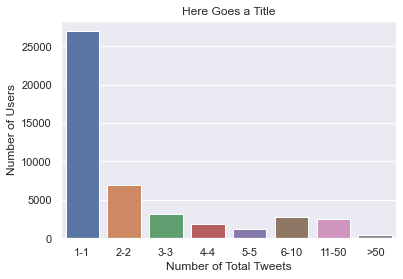

In [24]:
labels, values = barplot_prep(distribution_tweets_user, 1,[1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Total Tweets");
p2.set_ylabel("Number of Users");
p2.set_title("Here Goes a Title")

Text(0.5, 1.0, 'Here Goes a Title')

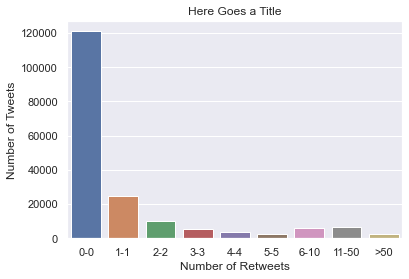

In [25]:
labels, values = barplot_prep(distribution_retweet, 0,[0,1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Retweets");
p2.set_ylabel("Number of Tweets");
p2.set_title("Here Goes a Title")

Text(0.5, 1.0, 'Here Goes a Title')

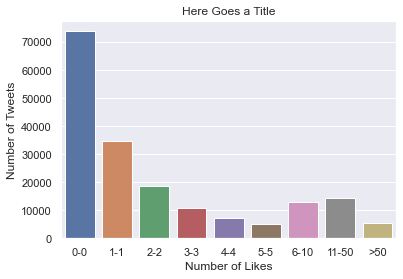

In [26]:
labels, values = barplot_prep(distribution_likes, 0,[0,1,2,3,4,5,10,50,100])
p2 = sns.barplot(x = labels, y = values)
p2.set_xlabel("Number of Likes");
p2.set_ylabel("Number of Tweets");
p2.set_title("Here Goes a Title")

**Some Observations and some things that we can try**
1. We cleaned a little our date. However, there are several entries with 'None' that should be cleaned.
2. Can't tell how accurate are the locations. There are several locations with names like "Next Door", "Nowhere & Everywhere", etc. Maybe these locations should be ignored. We cannot tell how the longitude and latitude where obtained.
3. The names of the user_location are not consistent. One alternative is to use the longitude and latitude to only record the country of origin. 

In [27]:
#This is the data set after deleating some repeated/incorrect entriees
df_tw.to_csv('Data/CleanedData.csv', index=False)